In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Paths
PREDICTIONS_DIR = Path("../predictions")

# Assets
ASSETS = ["AAPL", "IBEX35", "MSFT", "NASDAQ", "S&P500"]

# Matplotlib style
plt.style.use("seaborn-v0_8-darkgrid")

In [3]:
# Load metrics
lstm_metrics = pd.read_csv(PREDICTIONS_DIR / "metrics_lstm_summary.csv")
tft_metrics = pd.read_csv(PREDICTIONS_DIR / "metrics_tft_summary.csv")

# Merge metrics by asset
metrics_df = pd.merge(lstm_metrics, tft_metrics, on="asset")
metrics_df

,asset,RMSE_LSTM,MAE_LSTM,R2_LSTM,RMSE_TFT,MAE_TFT,R2_TFT
0,AAPL,0.016830,0.010322,0.634259,0.010897,0.006138,0.846671
1,IBEX35,0.004780,0.003490,0.615035,0.002564,0.001724,0.889223
2,MSFT,0.011099,0.007352,0.631653,0.005613,0.003506,0.905793
3,NASDAQ,0.009321,0.005577,0.690937,0.006989,0.003823,0.826234
4,S&P500,0.006491,0.003953,0.720691,0.004418,0.002601,0.870621


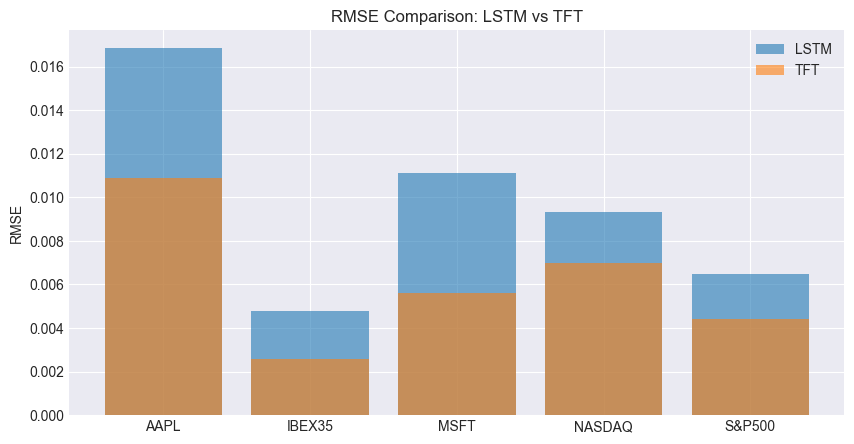

In [4]:
# Plot RMSE comparison
plt.figure(figsize=(10, 5))
plt.bar(metrics_df["asset"], metrics_df["RMSE_LSTM"], alpha=0.6, label="LSTM")
plt.bar(metrics_df["asset"], metrics_df["RMSE_TFT"], alpha=0.6, label="TFT")
plt.title("RMSE Comparison: LSTM vs TFT")
plt.ylabel("RMSE")
plt.legend()
plt.show()

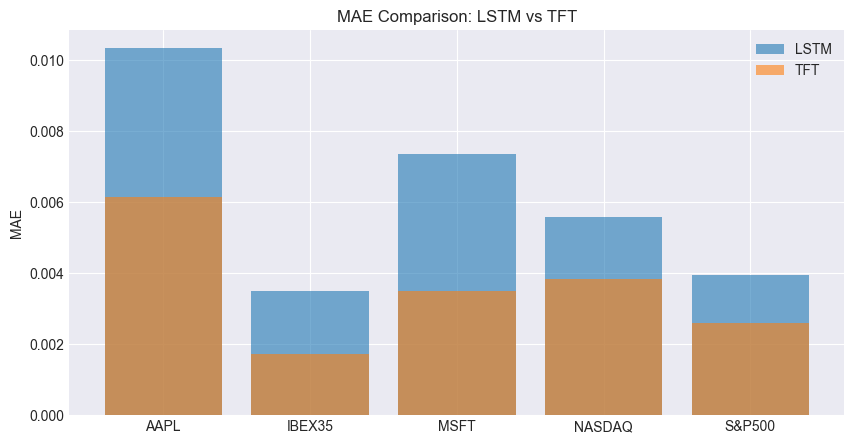

In [5]:
# Plot MAE comparison
plt.figure(figsize=(10, 5))
plt.bar(metrics_df["asset"], metrics_df["MAE_LSTM"], alpha=0.6, label="LSTM")
plt.bar(metrics_df["asset"], metrics_df["MAE_TFT"], alpha=0.6, label="TFT")
plt.title("MAE Comparison: LSTM vs TFT")
plt.ylabel("MAE")
plt.legend()
plt.show()

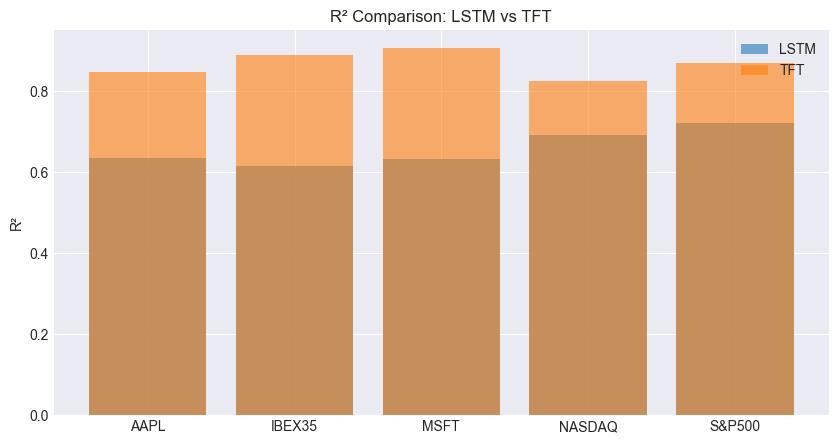

In [6]:
# Plot R² comparison
plt.figure(figsize=(10, 5))
plt.bar(metrics_df["asset"], metrics_df["R2_LSTM"], alpha=0.6, label="LSTM")
plt.bar(metrics_df["asset"], metrics_df["R2_TFT"], alpha=0.6, label="TFT")
plt.title("R² Comparison: LSTM vs TFT")
plt.ylabel("R²")
plt.legend()
plt.show()

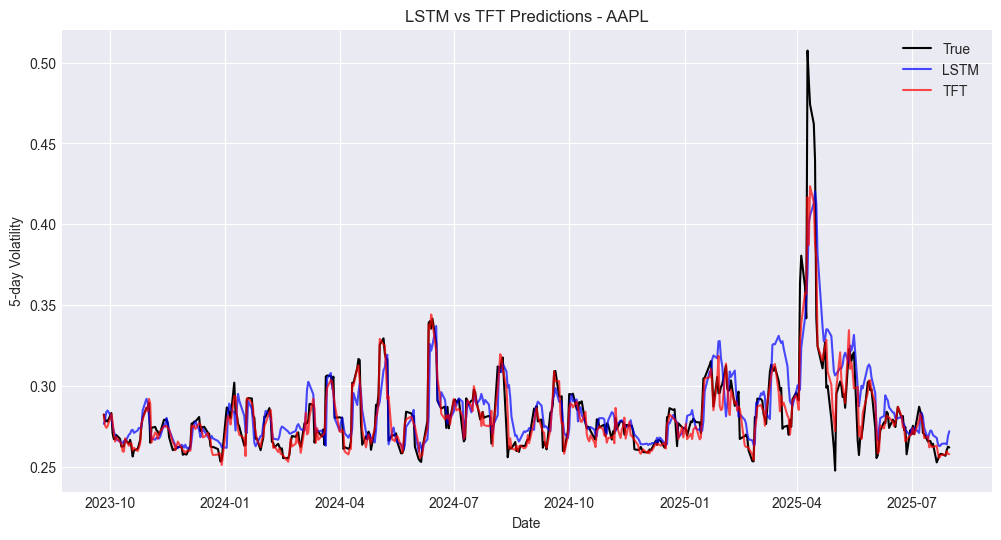

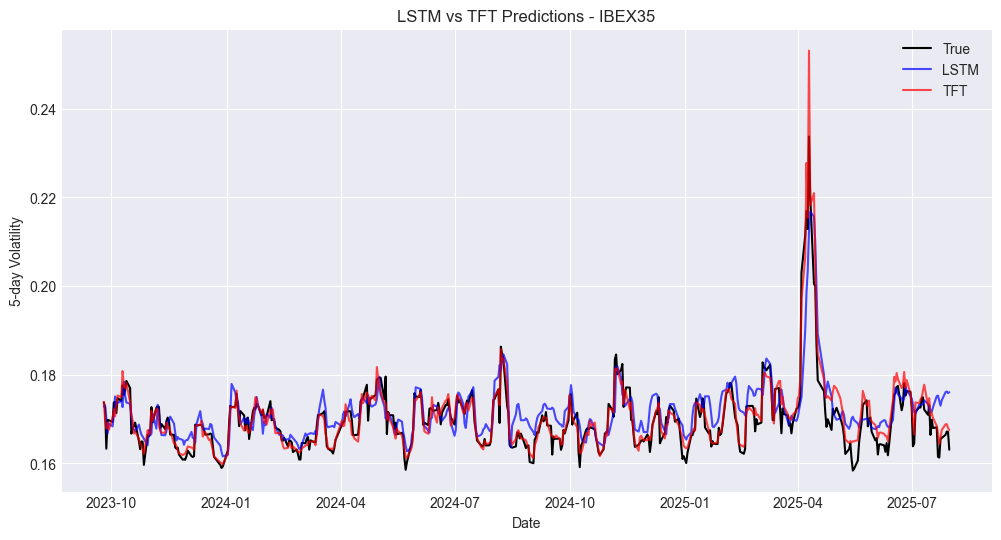

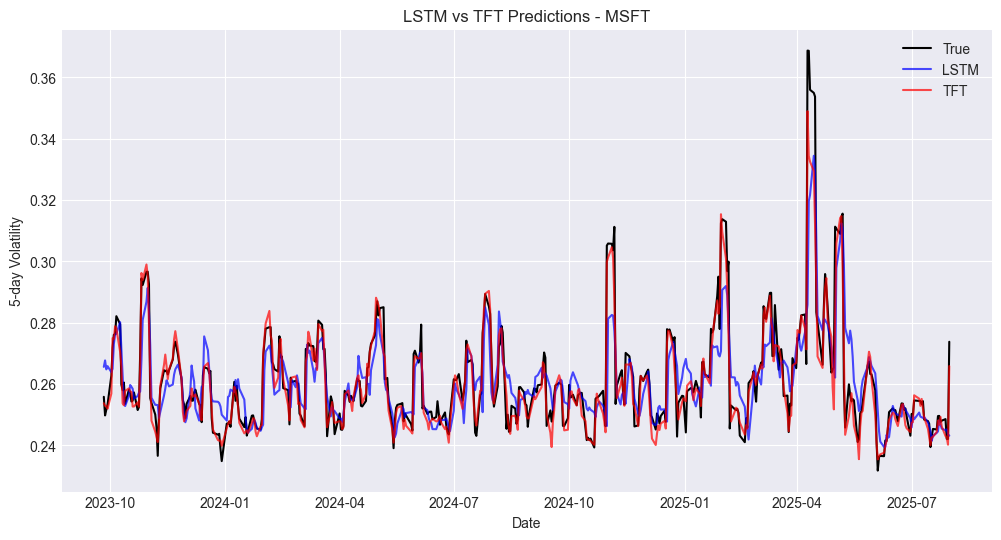

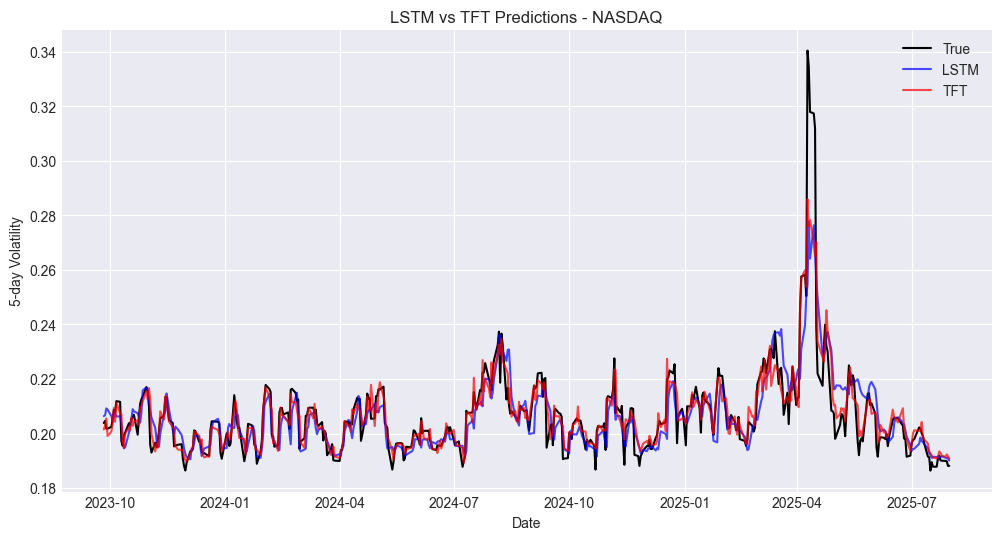

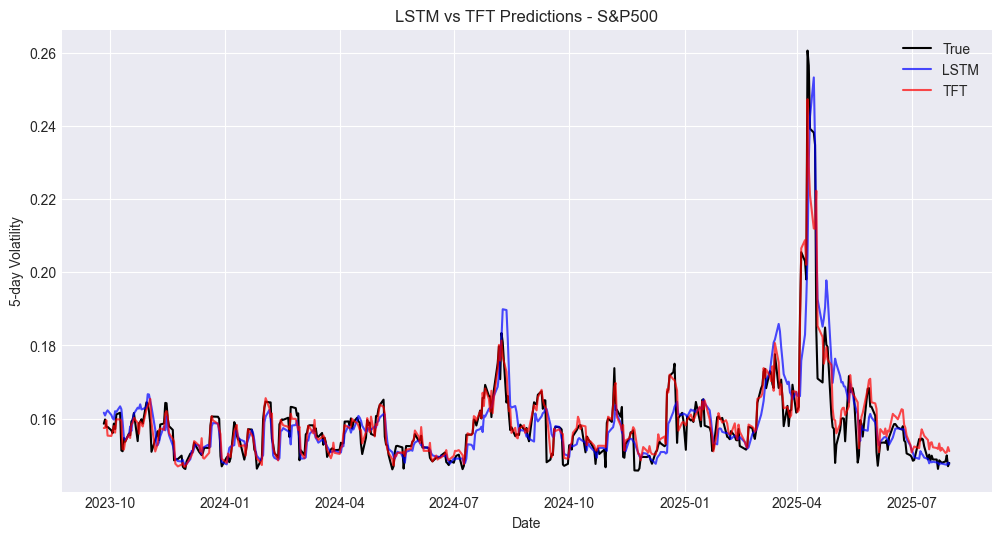

In [7]:
# Side-by-side prediction plots for each asset
for asset in ASSETS:
    lstm_pred = pd.read_csv(PREDICTIONS_DIR / f"predictions_lstm_{asset}.csv", parse_dates=["date"])
    tft_pred = pd.read_csv(PREDICTIONS_DIR / f"predictions_tft_{asset}.csv", parse_dates=["date"])

    plt.figure(figsize=(12, 6))
    plt.plot(lstm_pred["date"], lstm_pred["y_true"], label="True", color="black")
    plt.plot(lstm_pred["date"], lstm_pred["y_pred"], label="LSTM", color="blue", alpha=0.7)
    plt.plot(tft_pred["date"], tft_pred["y_pred"], label="TFT", color="red", alpha=0.7)
    plt.title(f"LSTM vs TFT Predictions - {asset}")
    plt.xlabel("Date")
    plt.ylabel("5-day Volatility")
    plt.legend()
    plt.show()

In [8]:
# Highlight best model for each metric
def highlight_best(df, metric, higher_is_better):
    """
    Returns a style highlight for the best model (LSTM or TFT) in a metric.
    """
    if higher_is_better:
        best_val = df[[f"{metric}_LSTM", f"{metric}_TFT"]].max(axis=1)
    else:
        best_val = df[[f"{metric}_LSTM", f"{metric}_TFT"]].min(axis=1)
    
    style = pd.DataFrame("", index=df.index, columns=df.columns)
    for model in ["LSTM", "TFT"]:
        col = f"{metric}_{model}"
        style.loc[df[col] == best_val, col] = "background-color: lightgreen"
    return style

In [9]:
# Apply styles
style_df = metrics_df.style \
    .apply(lambda x: highlight_best(metrics_df, "RMSE", higher_is_better=False), axis=None) \
    .apply(lambda x: highlight_best(metrics_df, "MAE", higher_is_better=False), axis=None) \
    .apply(lambda x: highlight_best(metrics_df, "R2", higher_is_better=True), axis=None) \
    .format(precision=4)

style_df

,asset,RMSE_LSTM,MAE_LSTM,R2_LSTM,RMSE_TFT,MAE_TFT,R2_TFT
0,AAPL,0.0168,0.0103,0.6343,0.0109,0.0061,0.8467
1,IBEX35,0.0048,0.0035,0.6150,0.0026,0.0017,0.8892
2,MSFT,0.0111,0.0074,0.6317,0.0056,0.0035,0.9058
3,NASDAQ,0.0093,0.0056,0.6909,0.0070,0.0038,0.8262
4,S&P500,0.0065,0.0040,0.7207,0.0044,0.0026,0.8706
